In [7]:
import warnings

warnings.simplefilter("ignore")
import numpy as np

np.seterr(all="ignore")

# %%capture
import matplotlib.pyplot as plt
from pathlib import Path
from threeML import *
from threeML.io.package_data import get_path_of_data_file

# we will need XPSEC models for extinction
from astromodels.xspec import *
from astromodels.xspec.xspec_settings import *

from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
set_threeML_style()
silence_warnings()

In [8]:
# don't forget to mount the drive
dir = '/home/arpan-john/Desktop/GC2/current'

import os
import glob
from Calculating_det_angles import estimate_source_angles_detectors  # Importing ma'am's function
from astropy.io import fits

# Finding Trigdat file
trig_string = "_trigdat_"
trig_pattern = os.path.join(dir, f"*{trig_string}*")
trigdat_file = glob.glob(trig_pattern)

print(trigdat_file)

for s in trigdat_file[0].split('_'):
    if 'bn' in s:
        trigger = s
        break
print(trigger)

# Getting the RA and DEC
with fits.open(trigdat_file[0], memmap=True) as pha_list:
    ra_obj, dec_obj = (pha_list[0].header['RA_OBJ']), (pha_list[0].header['DEC_OBJ'])

brightest_nai, bright_nais, brightest_bgo = estimate_source_angles_detectors.angle_to_grb(ra_obj, dec_obj,trigdat_file[0])

print(brightest_nai)
print(bright_nais)
print(brightest_bgo)

# Finding TTE files
tte_string = "_tte_"
tte_pattern = os.path.join(dir, f"*{tte_string}*")
tte_files = glob.glob(tte_pattern)
tte_files.sort()
print(tte_files)

# Finding rsp files
rsp_string = ".rsp"
rsp_pattern = os.path.join(dir, f"*{rsp_string}*")
rsp_files = glob.glob(rsp_pattern)

for file in rsp_files:
    if 'ctime' in file:
        rsp_files.remove(file)
        continue
    if 'ctime' in file.split('_'):
        rsp_files.remove(file)
        
rsp_files.sort()
print(rsp_files)


['/home/arpan-john/Desktop/GC2/current/glg_trigdat_all_bn170815526_v01.fit']
bn170815526
 
The brightest NaI detector is na - Source angle is: 31 deg
The brightest 3 NaI detectors are na ( 31 deg) nb ( 35 deg) n9 ( 61 deg)
The brightest BGO detector is b1 ( 32 deg )
na
['na', 'nb', 'n9']
['b1']
['/home/arpan-john/Desktop/GC2/current/glg_tte_b0_bn170815526_v00.fit', '/home/arpan-john/Desktop/GC2/current/glg_tte_b1_bn170815526_v00.fit', '/home/arpan-john/Desktop/GC2/current/glg_tte_n0_bn170815526_v00.fit', '/home/arpan-john/Desktop/GC2/current/glg_tte_n1_bn170815526_v00.fit', '/home/arpan-john/Desktop/GC2/current/glg_tte_n2_bn170815526_v00.fit', '/home/arpan-john/Desktop/GC2/current/glg_tte_n3_bn170815526_v00.fit', '/home/arpan-john/Desktop/GC2/current/glg_tte_n4_bn170815526_v00.fit', '/home/arpan-john/Desktop/GC2/current/glg_tte_n5_bn170815526_v00.fit', '/home/arpan-john/Desktop/GC2/current/glg_tte_n6_bn170815526_v00.fit', '/home/arpan-john/Desktop/GC2/current/glg_tte_n7_bn170815526_v00

In [9]:
NaI_detectors = []
rsp_NaI_files = []
rsp2_NaI_files = []
for nai in bright_nais:
    for file in rsp_files:
        if 'ctime' in file:
            rsp_files.remove(file)
            continue
        elif brightest_bgo[0] in file and 'rsp2' in file:
            rsp2_BGO_file = [file]
            continue
        elif brightest_bgo[0] in file and 'rsp' in file:
            rsp_BGO_file = [file]
            continue
        elif nai in file and 'rsp2' in file:
            rsp2_NaI_files.append(file)
            continue
        elif nai in file and 'rsp' in file:
            rsp_NaI_files.append(file)
    for file in tte_files:
        if brightest_bgo[0] in file:
            BGO_detector = [file]
        if nai in file:
            NaI_detectors.append(file)
            break
print(NaI_detectors)
print(BGO_detector)
print(rsp_NaI_files)
print(rsp2_NaI_files)
print(rsp_BGO_file)
try:
    print(rsp2_BGO_file)
except:
    print('no rsp2 file')

['/home/arpan-john/Desktop/GC2/current/glg_tte_na_bn170815526_v00.fit', '/home/arpan-john/Desktop/GC2/current/glg_tte_nb_bn170815526_v00.fit', '/home/arpan-john/Desktop/GC2/current/glg_tte_n9_bn170815526_v00.fit']
['/home/arpan-john/Desktop/GC2/current/glg_tte_b1_bn170815526_v00.fit']
['/home/arpan-john/Desktop/GC2/current/glg_cspec_na_bn170815526_v01.rsp', '/home/arpan-john/Desktop/GC2/current/glg_cspec_nb_bn170815526_v01.rsp', '/home/arpan-john/Desktop/GC2/current/glg_cspec_n9_bn170815526_v01.rsp']
['/home/arpan-john/Desktop/GC2/current/glg_cspec_na_bn170815526_v01.rsp2', '/home/arpan-john/Desktop/GC2/current/glg_cspec_nb_bn170815526_v01.rsp2', '/home/arpan-john/Desktop/GC2/current/glg_cspec_n9_bn170815526_v01.rsp2']
['/home/arpan-john/Desktop/GC2/current/glg_cspec_b1_bn170815526_v01.rsp']
['/home/arpan-john/Desktop/GC2/current/glg_cspec_b1_bn170815526_v01.rsp2']


Earliest count -136.71, latest count 477.70


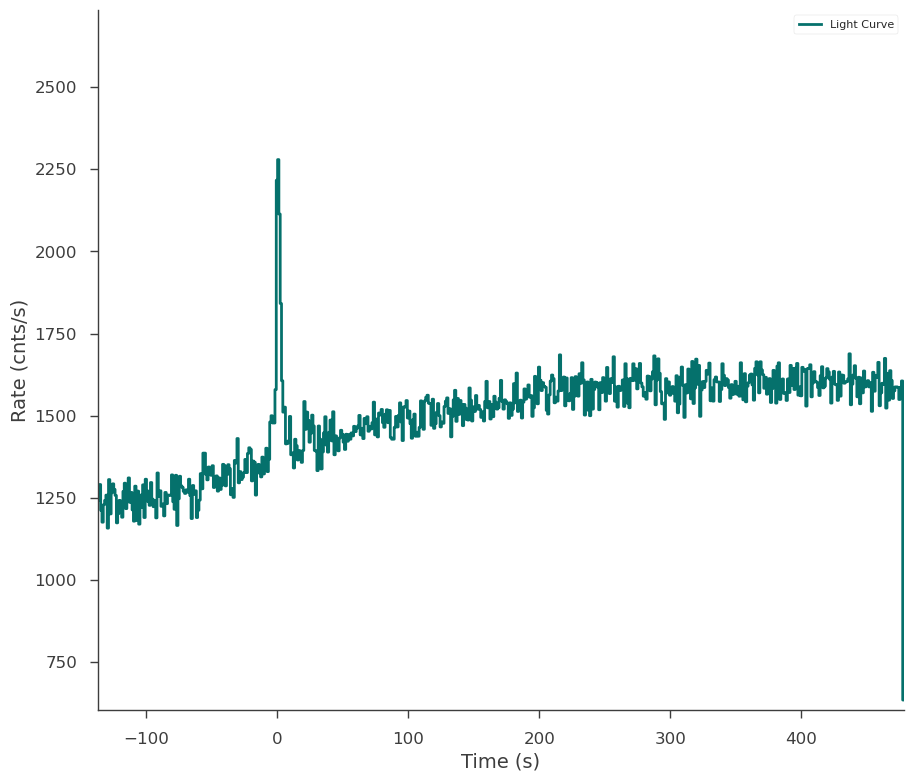

In [10]:
#building the time series

def build_ts_tte(name,tte_file,rsp_file,trigdat_file):
    ts = TimeSeriesBuilder.from_gbm_tte(
        name,
        tte_file=tte_file,
        rsp_file=rsp_file,
        trigdat_file=trigdat_file
    )

    with fits.open(tte_file, memmap=True) as hdul:
        all_count_data = hdul[2].data
        trigtime = hdul[2].header['TRIGTIME']

    counts = all_count_data['TIME'].astype(float) - trigtime
    cmin = counts.min()
    cmax = counts.max()
    print(f"Earliest count {cmin:.2f}, latest count {cmax:.2f}")
    fig = ts.view_lightcurve(cmin,cmax)
    return ts,cmin,cmax

ts,cmin,cmax = build_ts_tte("gbm_na",
                           tte_file='/home/arpan-john/Desktop/GC2/current/glg_tte_na_bn170815526_v00.fit',
                           rsp_file='/home/arpan-john/Desktop/GC2/current/glg_cspec_na_bn170815526_v01.rsp', #'/home/arpan-john/Desktop/GC2/current/glg_cspec_na_bn170815526_v01.rsp2'
                           trigdat_file='/home/arpan-john/Desktop/GC2/current/glg_trigdat_all_bn170815526_v01.fit')

Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

23:56:47 INFO      Auto-determined polynomial order: 2                                            ]8;id=974764;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=292892;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting GBM_NAI_10 background:   0%|          | 0/128 [00:00<?, ?it/s]

23:57:04 INFO      None 2-order polynomial fit with the mle method                               ]8;id=669508;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=532961;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Saved fitted background to n3_bkg.h5                                         ]8;id=26485;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=576560;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#1064\1064]8;;\

         INFO      Saved background to n3_bkg.h5                                         ]8;id=532079;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=465646;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#471\471]8;;\

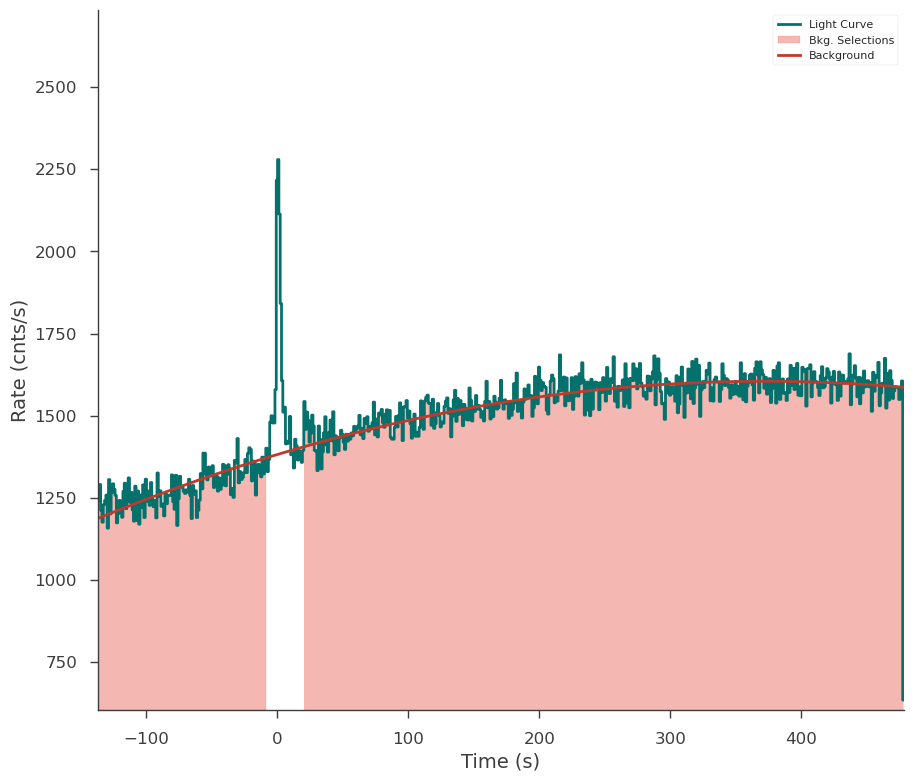

In [11]:
# Select the time interval
bkg_selection = [f"{cmin}--8.0", f"20-{cmax}"]
ts.set_background_interval(*bkg_selection)
ts.save_background("n3_bkg.h5", overwrite=True)

fig = ts.view_lightcurve(cmin,cmax)

23:57:07 INFO      Created 601 bins via constant                                         ]8;id=512836;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=454179;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

1670 6.613794419472403 time interval -1.537727994441866 - -0.513727994441866 (duration: 1.024)
2363 22.92191977319624 time interval -0.5137279944418651 - 0.5102720055581349 (duration: 1.024)
2316 21.83519000031111 time interval 0.5102720055581358 - 1.5342720055581358 (duration: 1.024)
2073 16.245864813465644 time interval 1.5342720055581367 - 2.5582720055581367 (duration: 1.024)
1810 9.941040724036606 time interval 2.5582720055581376 - 3.5822720055581376 (duration: 1.024)
1584 4.26667962128896 time interval 3.5822720055581385 - 4.6062720055581385 (duration: 1.024)
-1.537727994441866
4.606272005558139


23:57:16 INFO      Interval set to -1.54-4.61 for gbm_na                                 ]8;id=583453;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=654393;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

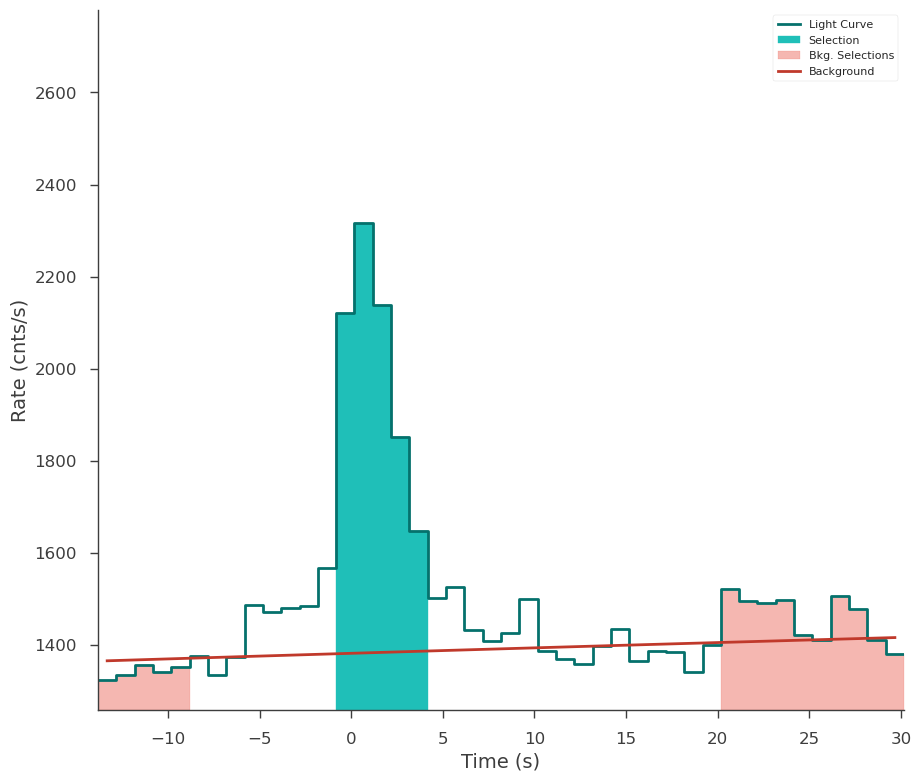

In [12]:
def find_act_inv(ts,cmin=cmin,cmax=cmax,type = 'long'):
    if type == 'long':
        dt = 1.024
    else:
        dt = 0.064
    ts.create_time_bins(start=cmin, stop=cmax, method='constant',dt = dt)
    skip = 0
    flag = 0
    for sig,tot,bins in zip (ts.significance_per_interval[skip:],ts.total_counts_per_interval[skip:],ts.bins[skip:]):
        if sig > 3.5:
            print(tot,sig,bins)        
        bins = str(bins)
        if sig > 3.5 and flag == 0:
            start = float(bins.split(' ')[2])
            flag = 1
        if sig < 3.5 and flag == 1:
            stop = float(bins.split(' ')[2])
            break
    print(start)
    print(stop)
    if (stop - start) < 2 and type == 'long':
        print('may be a short GRB')
    return start,stop

start , stop = find_act_inv(ts)
act_inv = [start , stop]
ts.set_active_time_interval(f"{act_inv[0]:.2f} - {act_inv[-1]:.2f}")
inv = act_inv[-1] - act_inv[0]
fig = ts.view_lightcurve(act_inv[0]-2*inv,act_inv[-1]+4*inv)

         INFO      Auto-probed noise models:                                                    ]8;id=539969;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=518695;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=952068;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=21764;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=612347;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=950856;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 8-900 translates to channels 4-123                                    ]8;id=132830;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=389805;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

,0
n. channels,128
total rate,1930.161525
total bkg. rate,1383.588271
total bkg. rate error,2.165115
bkg. exposure,6.124876
bkg. is poisson,False
exposure,6.124876
is poisson,True
background,profiled
significance,33.905428


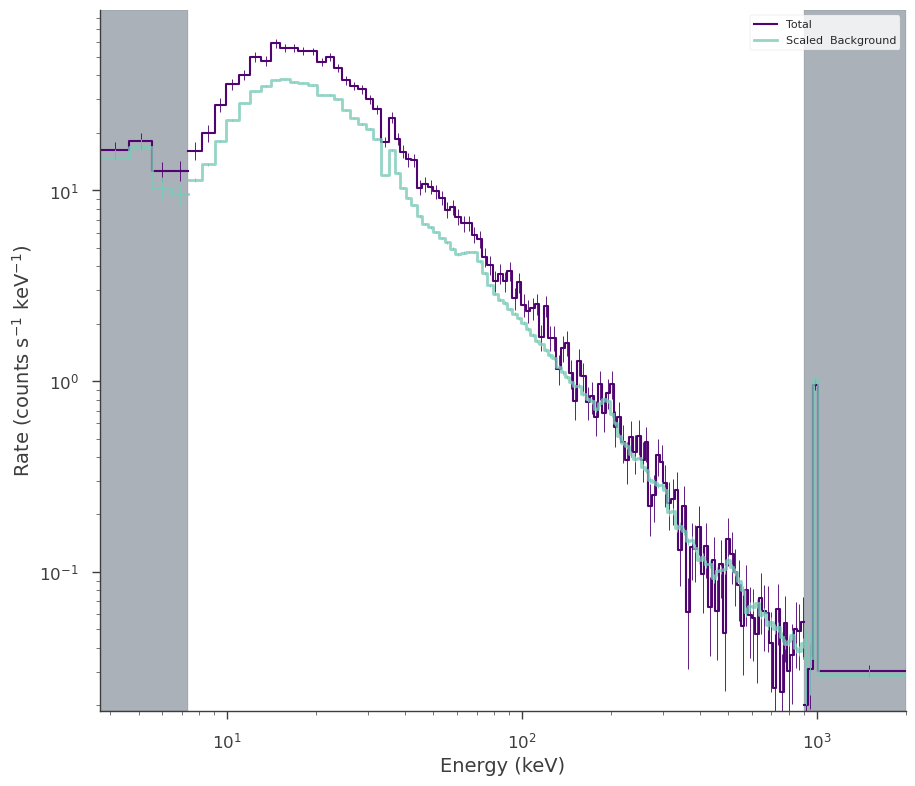

In [13]:

gbm_plugin = ts.to_spectrumlike()
gbm_plugin.set_active_measurements("8-900")
gbm_plugin.display()
fig = gbm_plugin.view_count_spectrum()

23:58:51 INFO      Created 7 bins via bayesblocks                                        ]8;id=609640;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=673153;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

,Start,Stop,Duration,Midpoint
0,-9.999948,-5.744830,4.255118,-7.872389
1,-5.744830,-0.561922,5.182908,-3.153376
2,-0.561922,1.696135,2.258057,0.567107
3,1.696135,3.629778,1.933643,2.662957
4,3.629778,9.541864,5.912086,6.585821
5,9.541864,9.542301,0.000437,9.542083
6,9.542301,19.999858,10.457557,14.771080


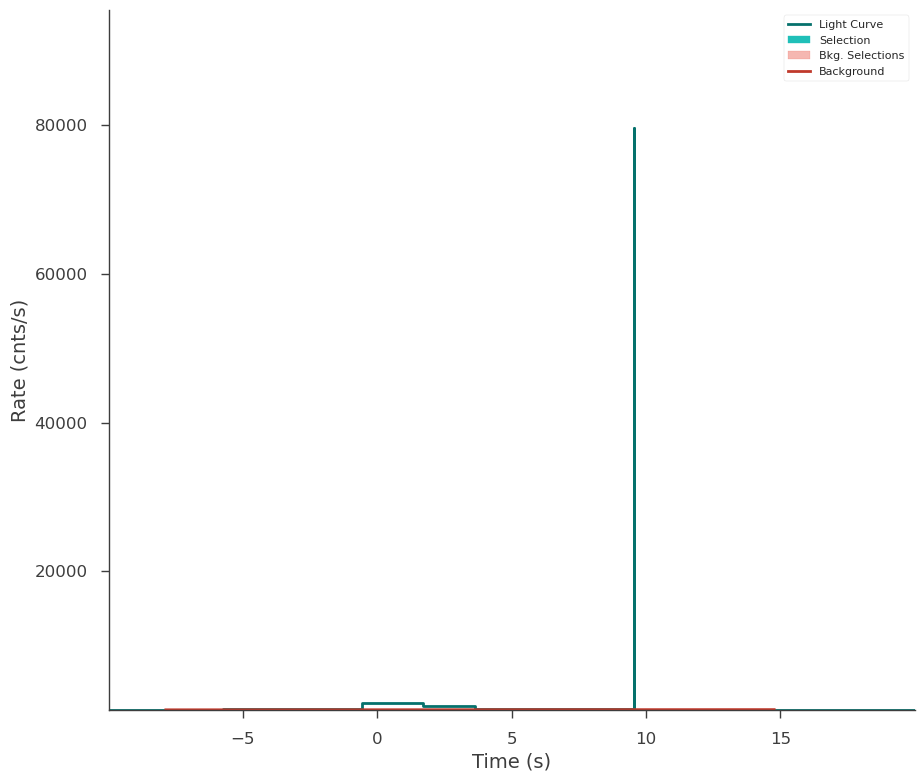

In [15]:
# Bayes block method
ts.create_time_bins(
    start=-10.0, stop=20.0, method="bayesblocks", p0=0.01, use_background=True
)

ts.bins.display()

fig = ts.view_lightcurve(use_binner=True)

23:58:52 INFO      Created 6 bins via custom                                             ]8;id=22686;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=214155;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

,Start,Stop,Duration,Midpoint
0,-9.999948,-5.744830,4.255118,-7.872389
1,-5.744830,-0.561922,5.182908,-3.153376
2,-0.561922,1.696135,2.258057,0.567107
3,1.696135,3.629778,1.933643,2.662957
4,3.629778,9.541864,5.912086,6.585821
5,9.541864,19.999858,10.457994,14.770861


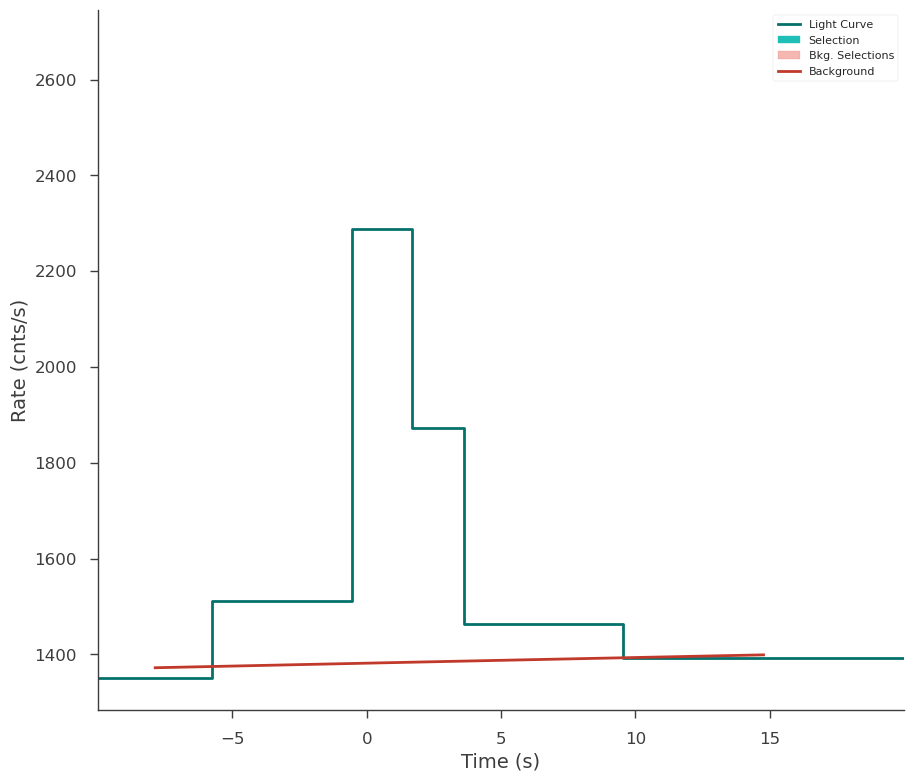

In [16]:
bad_bins = []
for i, w in enumerate(ts.bins.widths):
    if w < 5e-2:
        bad_bins.append(i)


edges = [ts.bins.starts[0]]

for i, b in enumerate(ts.bins):
    if i not in bad_bins:
        edges.append(b.stop)

starts = edges[:-1]
stops = edges[1:]


ts.create_time_bins(starts, stops, method="custom")
ts.bins.display()

fig = ts.view_lightcurve(use_binner=True)

23:58:53 INFO      Auto-probed noise models:                                                    ]8;id=344714;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=600543;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=849402;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=446823;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=442099;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=245617;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 8-900 translates to channels 4-123                                    ]8;id=690525;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=876543;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

,0
n. channels,128
total rate,1478.243662
total bkg. rate,1448.350157
total bkg. rate error,2.193706
bkg. exposure,1.020806
bkg. is poisson,False
exposure,1.020806
is poisson,True
background,profiled
significance,0.789565


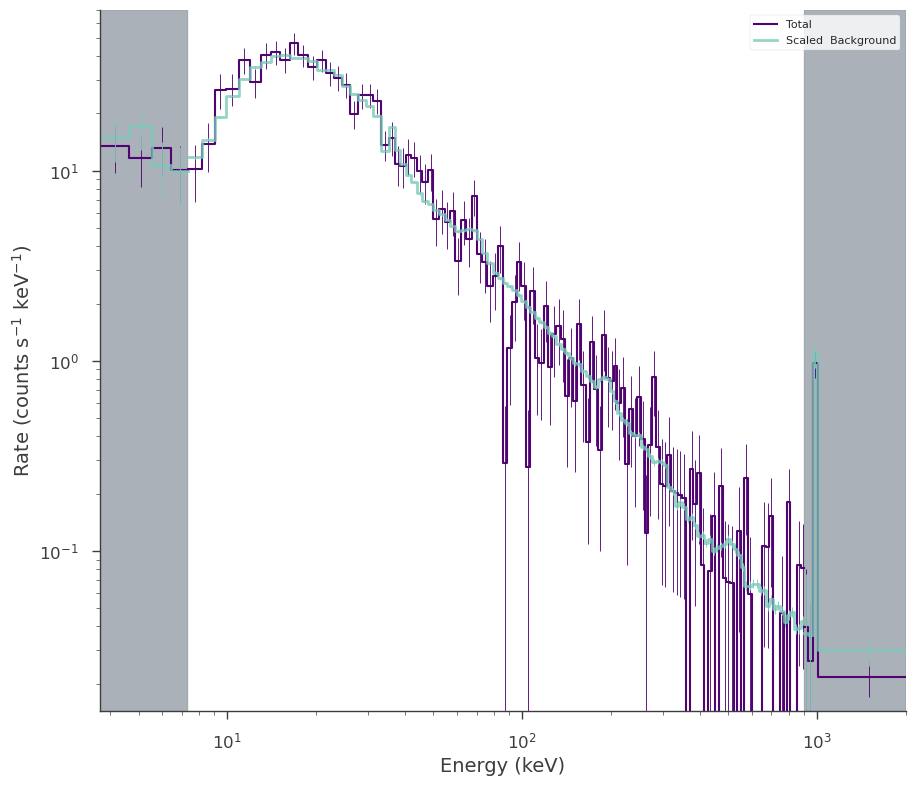

In [17]:

gbm_plugin = ts.to_spectrumlike()
gbm_plugin.set_active_measurements("8-900")
gbm_plugin.display()
fig = gbm_plugin.view_count_spectrum()

In [18]:
for sig,tot,bins in zip (ts.significance_per_interval,ts.total_counts_per_interval,ts.bins):
    print(tot,sig,bins)      

5730 -1.41912427099664 time interval -9.999947965145111 - -5.74482998251915 (duration: 4.255117982625961)
7812 7.740154888672619 time interval -5.74482998251915 - -0.561922013759613 (duration: 5.182907968759537)
5142 32.89334811850513 time interval -0.561922013759613 - 1.696135014295578 (duration: 2.258057028055191)
3608 16.99694464623066 time interval 1.696135014295578 - 3.6297779977321625 (duration: 1.9336429834365845)
8630 4.492497356814871 time interval 3.6297779977321625 - 9.54186400771141 (duration: 5.912086009979248)
14522 -0.8945186717982947 time interval 9.54186400771141 - 19.999858021736145 (duration: 10.457994014024734)


In [19]:
xspec_abund("angr")

spectral_model = XS_phabs() * XS_zphabs() * Powerlaw()

# spectral_model.nh_1 = 0.101
# spectral_model.nh_1.bounds = (None, None)
# spectral_model.nh_1.fix = True

# spectral_model.nh_2 = 0.1114424
# spectral_model.nh_2.fix = True
# spectral_model.nh_2.bounds = (None, None)
# spectral_model.redshift_2 = 0.618
# spectral_model.redshift_2.fix = True

# phabs_local = PhAbs(NH=0.101)
# phabs_local.NH.fix = True
# phabs_local.redshift.fix = True
# phabs_src = PhAbs(NH=0.1114424, redshift=0.618)
# phabs_src.NH.fix = True
# phabs_src.redshift.fix = True
# pl = Powerlaw()
# spectral_model_native = phabs_local * phabs_src * pl

 Solar Abundance Vector set to angr:  Anders E. & Grevesse N. Geochimica et Cosmochimica Acta 53, 197 (1989)


In [22]:
ptsrc = PointSource(trigger, ra_obj, dec_obj, spectral_shape=spectral_model)
model = Model(ptsrc)

data = DataList(gbm_plugin)

jl = JointLikelihood(model, data, verbose=False)
model.display()

23:59:57 INFO      set the minimizer to minuit                                             ]8;id=217791;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=19709;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1045\1045]8;;\

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (5):
--------------------

                                         value min_value  max_value  \
bn170815526.spectrum.main.composite.nh_1   1.0       0.0  1000000.0   
bn170815526.spectrum.main.composite.nh_2   1.0       0.0  1000000.0   
bn170815526...redshift_2                   0.0    -0.999       10.0   
bn170815526.spectrum.main.composite.K_3    1.0       0.0     1000.0   
bn170815526...index_3                    -2.01     -10.0       10.0   

                                                    unit  
bn170815526.spectrum.main.composite.nh_1                  
bn170815526.spectrum.main.composite.nh_2                  
bn170815526...redshift_2                                  
bn170815526.spectrum.main.composite.K_3   keV-1 s-1 cm-2  
bn170815526...index_3                                     

Fixed parameters (4):
(abridged. Use complete=True to see all fixed parameters)


Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

Best fit values:

,result,unit
parameter,,
bn170815526.spectrum.main.composite.nh_1,0 +/- 8,
bn170815526.spectrum.main.composite.nh_2,(0 +/- 5) x 10^3,
bn170815526.spectrum.main.composite.redshift_2,2 +/- 8,
bn170815526.spectrum.main.composite.K_3,(0.028 -0.028 +5) x 10^3,1 / (keV s cm2)
bn170815526.spectrum.main.composite.index_3,-2.5 +/- 1.7,


Correlation matrix:

1.00,-0.01,0.00,0.02,-0.01
-0.01,1.00,-0.11,0.56,-0.49
0.00,-0.11,1.00,-0.11,0.10
0.02,0.56,-0.11,1.00,-0.99
-0.01,-0.49,0.10,-0.99,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
gbm_na,138.247204
total,138.247204


Values of statistical measures:

,statistical measures
AIC,287.020724
BIC,300.431867


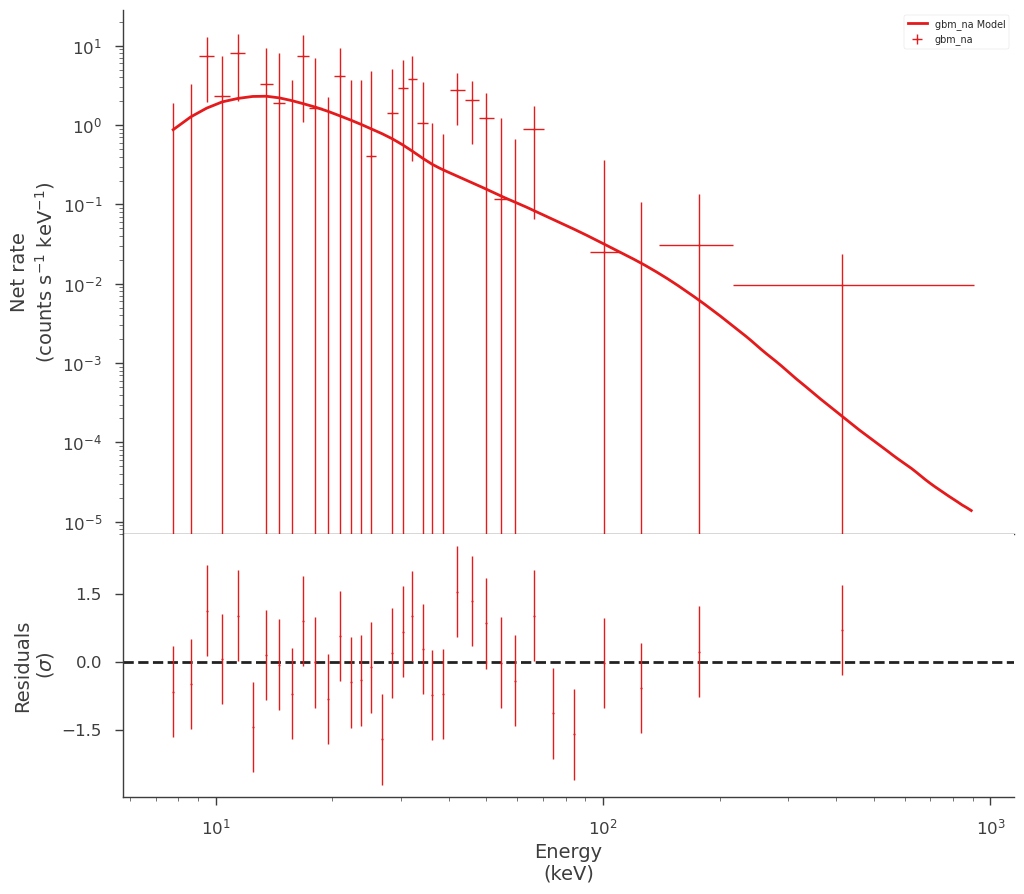

In [23]:
res = jl.fit()
fig = display_spectrum_model_counts(jl, min_rate=[0.5, 0.1])

Profiling likelihood:   0%|          | 0/50 [00:00<?, ?it/s]

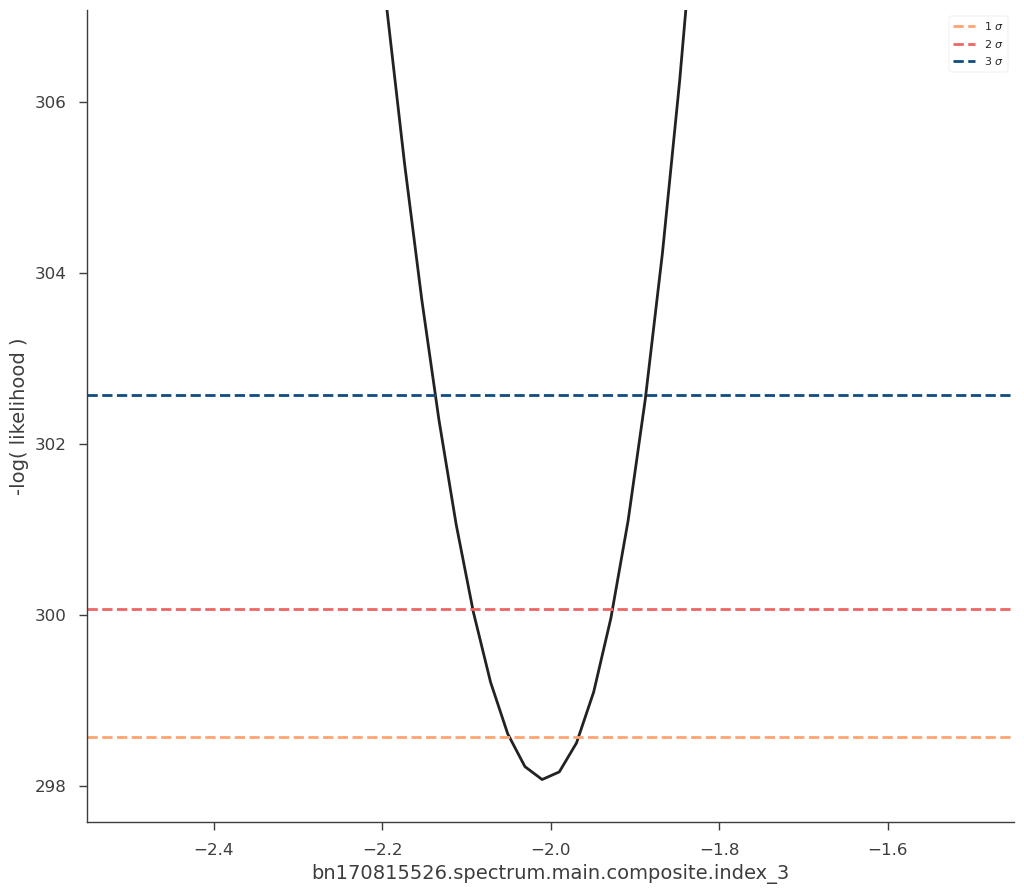

In [ ]:
res = jl.get_contours(spectral_model.index_3, -2.5, -1.5, 50)

Profiling likelihood:   0%|          | 0/1250 [00:00<?, ?it/s]

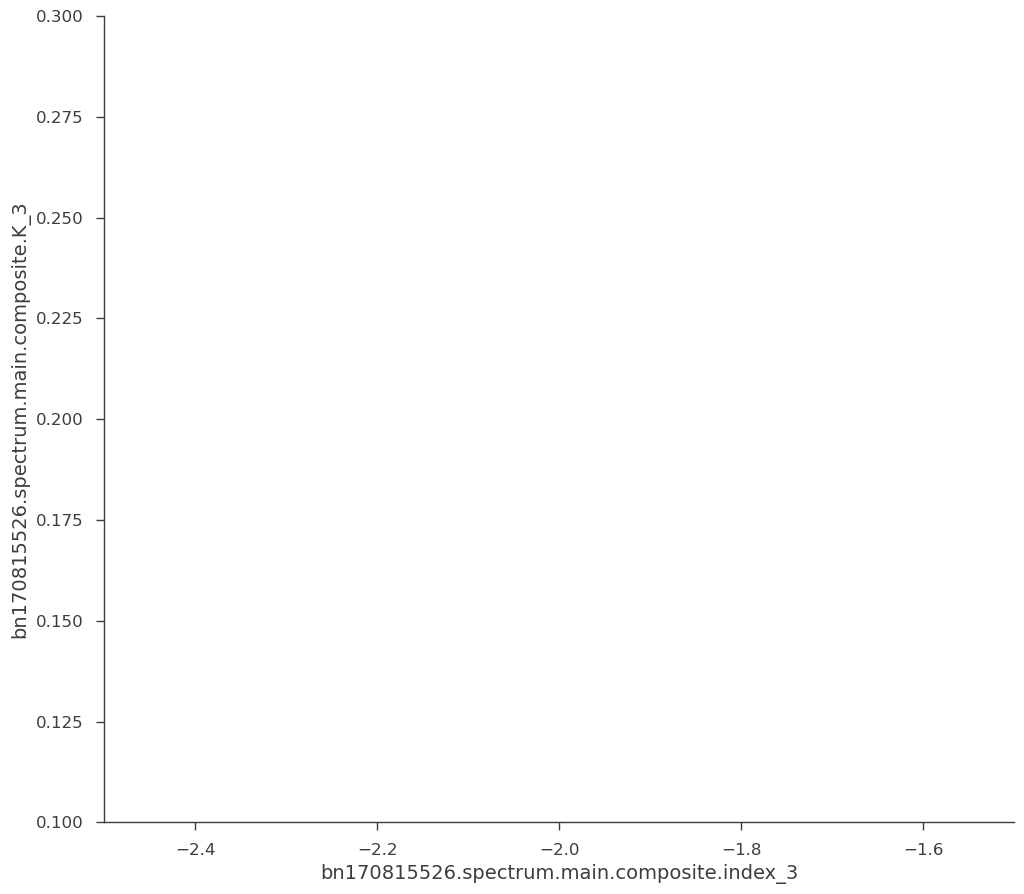

In [ ]:
_ = jl.get_contours(
    spectral_model.K_3, 0.1, 0.3, 25, spectral_model.index_3, -2.5, -1.5, 50
)

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

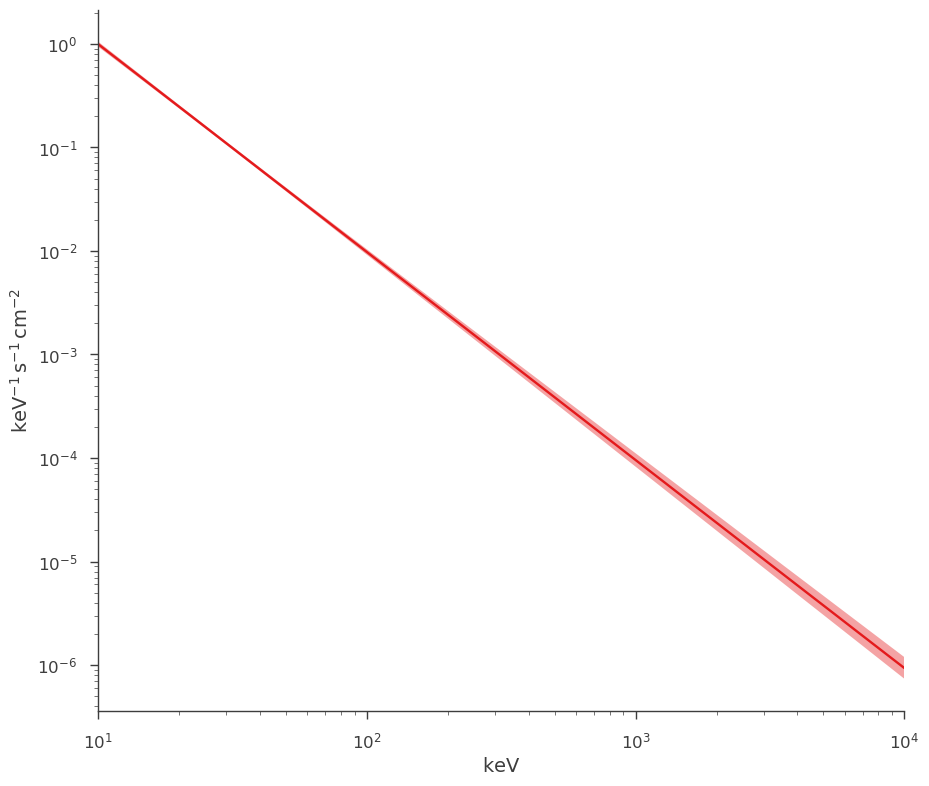

In [ ]:
fig = plot_spectra(jl.results, show_legend=False, emin=0.01 * u.keV)

In [ ]:
ptsrc_native = PointSource(trigger, ra_obj, dec_obj, spectral_shape=spectral_model_native)
model_native = Model(ptsrc_native)

data = DataList(nai3)

19:08:58 INFO      set the minimizer to minuit                                             ]8;id=306021;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=843120;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1045\1045]8;;\

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (2):
--------------------

                                             value min_value max_value  \
bn170815526.spectrum.main.composite.K_3  44.728228       0.0    1000.0   
bn170815526...index_3                    -1.995552     -10.0      10.0   

                                                   unit  
bn170815526.spectrum.main.composite.K_3  keV-1 s-1 cm-2  
bn170815526...index_3                                    

Fixed parameters (7):
(abridged. Use complete=True to see all fixed parameters)


Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

Best fit values:

,result,unit
parameter,,
bn170815526.spectrum.main.composite.K_3,(1.01 -0.14 +0.16) x 10^2,1 / (keV s cm2)
bn170815526.spectrum.main.composite.index_3,-2.01 +/- 0.04,


Correlation matrix:

1.00,-0.97
-0.97,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
gbm_n3,298.085846
total,298.085846


Values of statistical measures:

,statistical measures
AIC,600.274256
BIC,605.746675


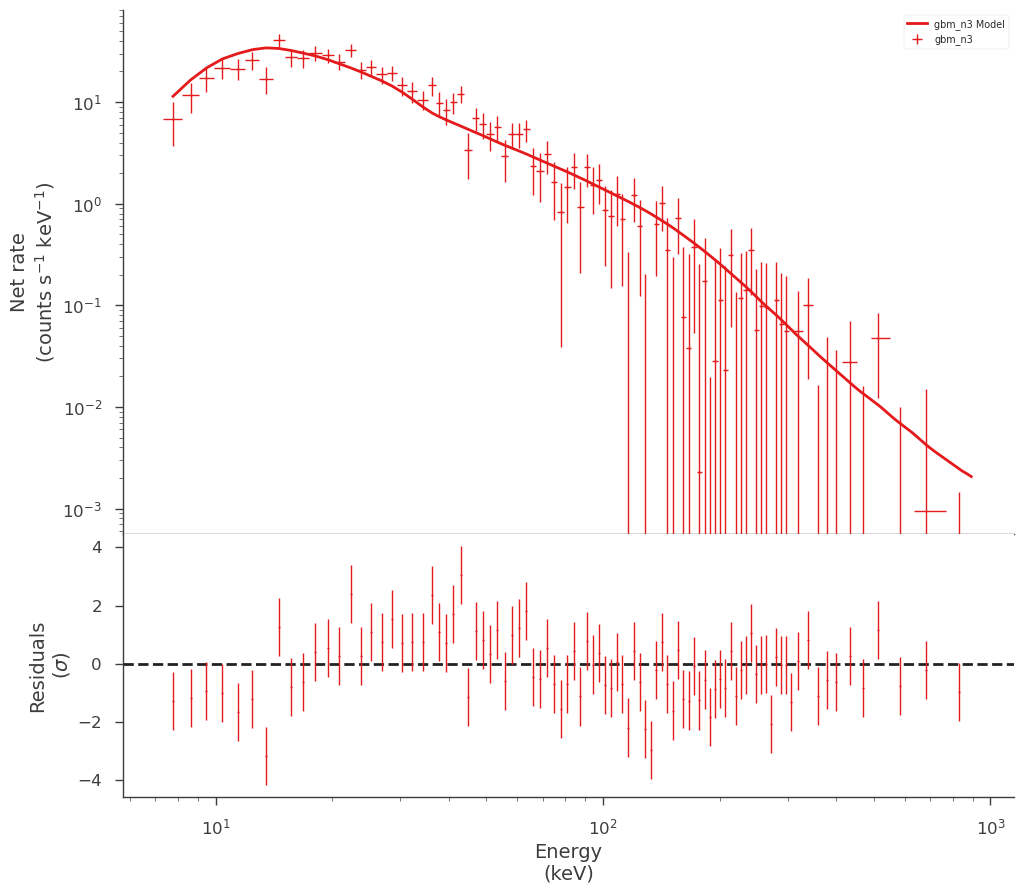

In [ ]:
res = jl_native.fit()
fig = display_spectrum_model_counts(jl_native, min_rate=[0.5, 0.1])

processing MLE analyses:   0%|          | 0/2 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

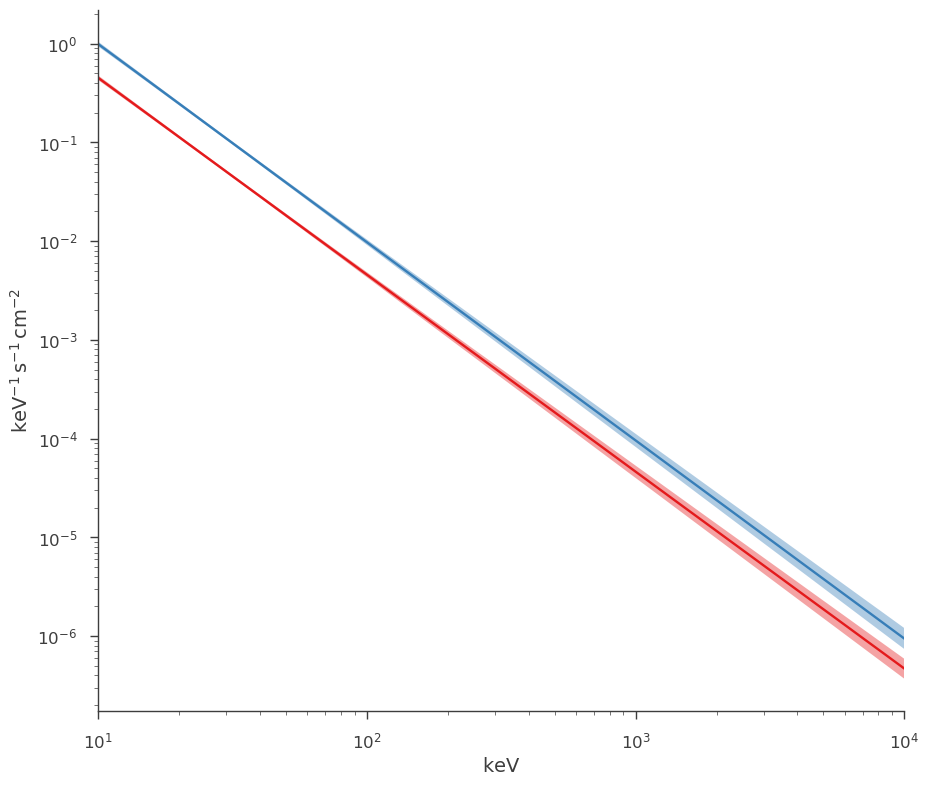

In [ ]:
fig = plot_spectra(jl.results, jl_native.results, show_legend=False, emin=0.01 * u.keV)